## Data Import

In [23]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os

%matplotlib inline

In [ ]:
# Cities.csv
# ConferenceTourneyGames.csv
# Conferences.csv
# GameCities.csv
# NCAATourneyCompactResults.csv
# NCAATourneyDetailedResults.csv
# NCAATourneySeedRoundSlots.csv
# NCAATourneySeeds.csv
# NCAATourneySlots.csv
# RegularSeasonCompactResults.csv
# RegularSeasonDetailedResults.csv
# Seasons.csv
# SecondaryTourneyCompactResults.csv
# SecondaryTourneyTeams.csv
# TeamCoaches.csv
# TeamConferences.csv
# TeamSpellings.csv
# Teams.csv

In [189]:
raw_data_path = os.path.join(os.path.pardir,'data','raw','DataFiles')

confs = os.path.join(raw_data_path, 'Conferences.csv')
ncaa_tourney_compact = os.path.join(raw_data_path, 'NCAATourneyCompactResults.csv')
ncaa_tourney_detailed = os.path.join(raw_data_path, 'NCAATourneyDetailedResults.csv')
ncaa_tourney_seeds = os.path.join(raw_data_path, 'NCAATourneySeeds.csv')
reg_season_compact = os.path.join(raw_data_path, 'RegularSeasonCompactResults.csv')
reg_season_detailed = os.path.join(raw_data_path, 'RegularSeasonDetailedResults.csv')
seeds = os.path.join(raw_data_path, 'NCAATourneySeeds.csv')
team_confs = os.path.join(raw_data_path, 'TeamConferences.csv')
teams = os.path.join(raw_data_path, 'Teams.csv')

sample_sub = os.path.join(os.path.pardir,'data','raw','SampleSubmissionStage1.csv')

df_confs = pd.read_csv(confs)
df_ncaa_tourney_compact = pd.read_csv(ncaa_tourney_compact)
df_ncaa_tourney_detailed = pd.read_csv(ncaa_tourney_detailed)
df_ncaa_tourney_seeds = pd.read_csv(ncaa_tourney_seeds)
df_reg_season_compact = pd.read_csv(reg_season_compact)
df_reg_season_detailed = pd.read_csv(reg_season_detailed)
df_seeds = pd.read_csv(seeds)
df_team_confs = pd.read_csv(team_confs)
df_teams = pd.read_csv(teams, index_col='TeamID')

df_sample_sub = pd.read_csv(sample_sub)

In [190]:
# Field Goal Percentage
df_ncaa_tourney_detailed['WFGP'] = df_ncaa_tourney_detailed.WFGM / df_ncaa_tourney_detailed.WFGA
df_ncaa_tourney_detailed['LFGP'] = df_ncaa_tourney_detailed.LFGM / df_ncaa_tourney_detailed.LFGA

# 2-pt Field Goal Percentage
df_ncaa_tourney_detailed['WFGP2'] = (df_ncaa_tourney_detailed.WFGM - df_ncaa_tourney_detailed.WFGM3) / (df_ncaa_tourney_detailed.WFGA - df_ncaa_tourney_detailed.WFGA3)
df_ncaa_tourney_detailed['LFGP2'] = (df_ncaa_tourney_detailed.LFGM - df_ncaa_tourney_detailed.LFGM3) / (df_ncaa_tourney_detailed.LFGA - df_ncaa_tourney_detailed.LFGA3)

# 3-pt Field Goal Percentage
df_ncaa_tourney_detailed['WFGP3'] = df_ncaa_tourney_detailed.WFGM3 / df_ncaa_tourney_detailed.WFGA3
df_ncaa_tourney_detailed['LFGP3'] = df_ncaa_tourney_detailed.LFGM3 / df_ncaa_tourney_detailed.LFGA3

# Free-Throw Percentage
df_ncaa_tourney_detailed['WFTP'] = df_ncaa_tourney_detailed.WFTM / df_ncaa_tourney_detailed.WFTA
df_ncaa_tourney_detailed['LFTP'] = df_ncaa_tourney_detailed.LFTM / df_ncaa_tourney_detailed.LFTA

# Offensive Rebound Percentage
df_ncaa_tourney_detailed['WORP'] = df_ncaa_tourney_detailed.WOR / (df_ncaa_tourney_detailed.WOR + df_ncaa_tourney_detailed.LDR)
df_ncaa_tourney_detailed['LORP'] = df_ncaa_tourney_detailed.LOR / (df_ncaa_tourney_detailed.LOR + df_ncaa_tourney_detailed.WDR)

# Defensive Rebound Percentage
df_ncaa_tourney_detailed['WDRP'] = df_ncaa_tourney_detailed.WDR / (df_ncaa_tourney_detailed.WDR + df_ncaa_tourney_detailed.LOR)
df_ncaa_tourney_detailed['LDRP'] = df_ncaa_tourney_detailed.LDR / (df_ncaa_tourney_detailed.LDR + df_ncaa_tourney_detailed.WOR)

In [191]:
win_stats = df_ncaa_tourney_detailed.loc[:,['Season','WTeamID','WScore','WFGM','WFGA','WFGP','WFGP2','WFGM3','WFGA3','WFGP3','WFTM','WFTA','WFTP','WOR','WDR','WAst','WTO','WStl','WBlk','WPF','WORP','WDRP']]
los_stats = df_ncaa_tourney_detailed.loc[:,['Season','LTeamID','LScore','LFGM','LFGA','LFGP','LFGP2','LFGM3','LFGA3','LFGP3','LFTM','LFTA','LFTP','LOR','LDR','LAst','LTO','LStl','LBlk','LPF','LORP','LDRP']]

In [153]:
win_stats.rename(columns={'WTeamID':'TeamID','WScore':'Score','WFGM':'FGM','WFGA':'FGA','WFGP':'FGP','WFGP2':'FGP2','WFGM3':'FGM3','WFGA3':'FGA3','WFGP3':'FGP3','WFTM':'FTM','WFTA':'FTA','WFTP':'FTP','WOR':'OR','WDR':'DR','WAst':'AST','WTO':'TO','WStl':'STL','WBlk':'BLK','WPF':'PF','WORP':'ORP','WDRP':'DRP'},inplace=True)
los_stats.rename(columns={'LTeamID':'TeamID','LScore':'Score','LFGM':'FGM','LFGA':'FGA','LFGP':'FGP','LFGP2':'FGP2','LFGM3':'FGM3','LFGA3':'FGA3','LFGP3':'FGP3','LFTM':'FTM','LFTA':'FTA','LFTP':'FTP','LOR':'OR','LDR':'DR','LAst':'AST','LTO':'TO','LStl':'STL','LBlk':'BLK','LPF':'PF','LORP':'ORP','LDRP':'DRP'},inplace=True)

In [200]:
win_stats.head()

,Season,WTeamID,WScore,WFGM,WFGA,WFGP,WFGP2,WFGM3,WFGA3,WFGP3,...,WFTP,WOR,WDR,WAst,WTO,WStl,WBlk,WPF,WORP,WDRP
0,2003,1421,92,32,69,0.463768,0.525000,11,29,0.379310,...,0.653846,14,30,17,12,5,3,22,0.333333,0.638298
1,2003,1112,80,31,66,0.469697,0.558140,7,23,0.304348,...,0.785714,11,36,22,16,10,7,8,0.297297,0.818182
2,2003,1113,84,31,59,0.525424,0.555556,6,14,0.428571,...,0.727273,10,27,18,9,7,4,19,0.312500,0.574468
3,2003,1141,79,29,53,0.547170,0.565217,3,7,0.428571,...,0.720000,11,20,15,18,13,1,19,0.392857,0.588235
4,2003,1143,76,27,64,0.421875,0.454545,7,20,0.350000,...,0.652174,18,20,17,13,8,2,14,0.409091,0.666667


In [ ]:
df_tour.drop(labels=['DayNum', 'WScore', 'LScore', 'WLoc', 'NumOT'], inplace=True, axis=1)

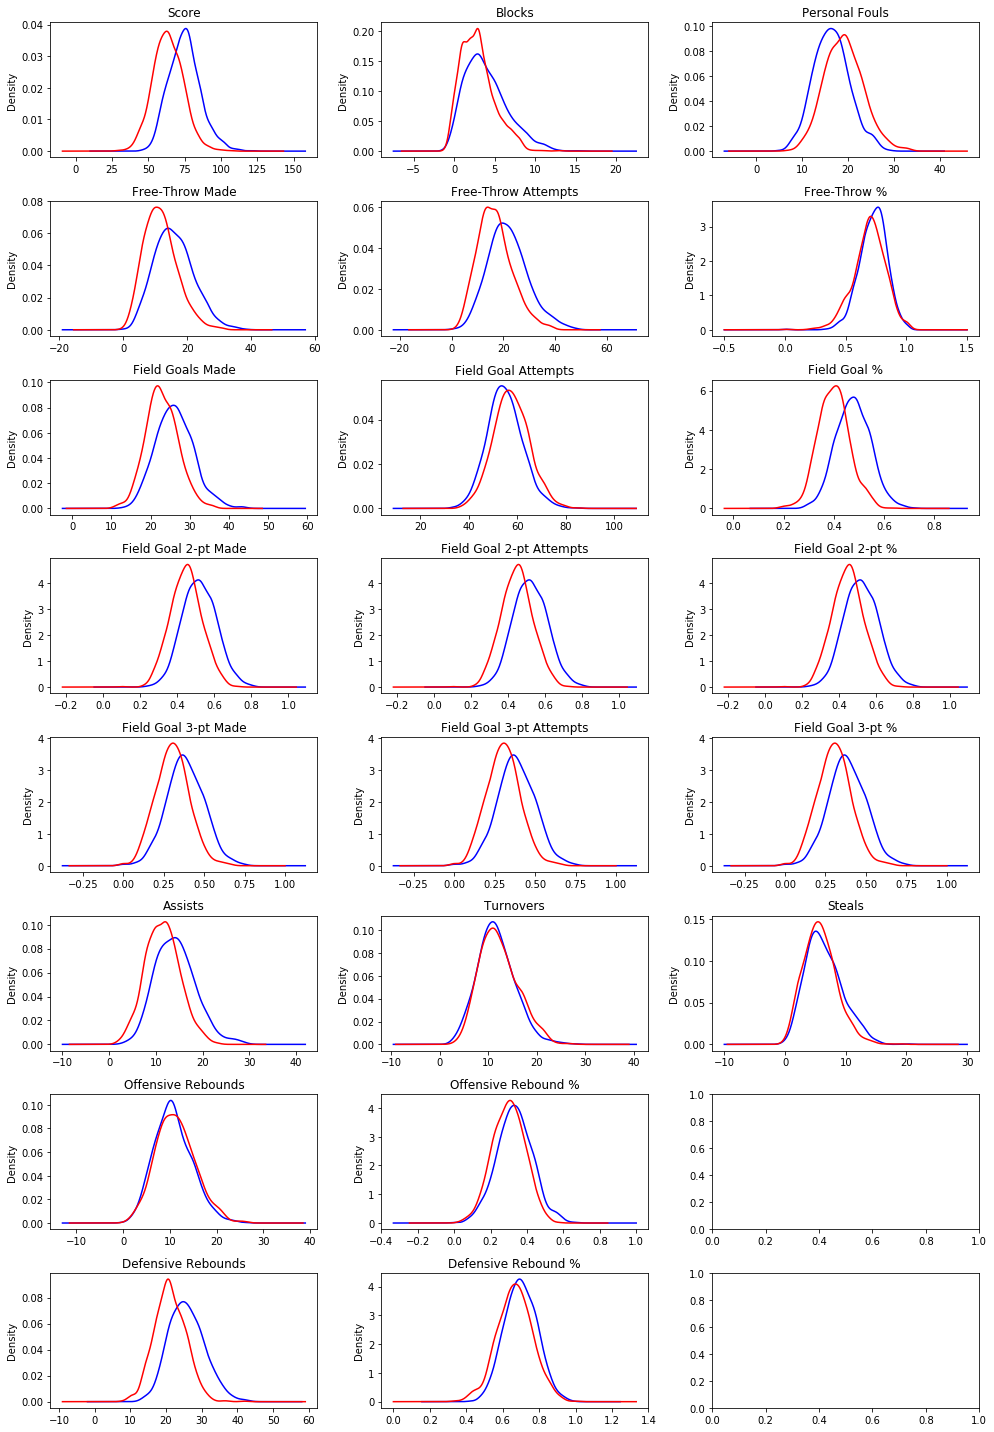

In [112]:
f, ax_arr = plt.subplots(8, 3, figsize=(14,20))

win_stats.Score.plot.kde(color='b', title='Score', ax=ax_arr[0,0])
los_stats.Score.plot.kde(color='r', ax=ax_arr[0,0]);

win_stats.BLK.plot.kde(color='b', title='Blocks', ax=ax_arr[0,1])
los_stats.BLK.plot.kde(color='r', ax=ax_arr[0,1]);

win_stats.PF.plot.kde(color='b', title='Personal Fouls', ax=ax_arr[0,2])
los_stats.PF.plot.kde(color='r', ax=ax_arr[0,2]);

win_stats.FTM.plot.kde(color='b', title='Free-Throw Made', ax=ax_arr[1,0])
los_stats.FTM.plot.kde(color='r', ax=ax_arr[1,0]);

win_stats.FTA.plot.kde(color='b', title='Free-Throw Attempts', ax=ax_arr[1,1])
los_stats.FTA.plot.kde(color='r', ax=ax_arr[1,1]);

win_stats.FTP.plot.kde(color='b', title='Free-Throw %', ax=ax_arr[1,2])
los_stats.FTP.plot.kde(color='r', ax=ax_arr[1,2]);

win_stats.FGM.plot.kde(color='b', title='Field Goals Made', ax=ax_arr[2,0])
los_stats.FGM.plot.kde(color='r', ax=ax_arr[2,0]);

win_stats.FGA.plot.kde(color='b', title='Field Goal Attempts', ax=ax_arr[2,1])
los_stats.FGA.plot.kde(color='r', ax=ax_arr[2,1]);

win_stats.FGP.plot.kde(color='b', title='Field Goal %', ax=ax_arr[2,2])
los_stats.FGP.plot.kde(color='r', ax=ax_arr[2,2]);

win_stats.FGP2.plot.kde(color='b', title='Field Goal 2-pt Made', ax=ax_arr[3,0])
los_stats.FGP2.plot.kde(color='r', ax=ax_arr[3,0]);

win_stats.FGP2.plot.kde(color='b', title='Field Goal 2-pt Attempts', ax=ax_arr[3,1])
los_stats.FGP2.plot.kde(color='r', ax=ax_arr[3,1]);

win_stats.FGP2.plot.kde(color='b', title='Field Goal 2-pt %', ax=ax_arr[3,2])
los_stats.FGP2.plot.kde(color='r', ax=ax_arr[3,2]);

win_stats.FGP3.plot.kde(color='b', title='Field Goal 3-pt Made', ax=ax_arr[4,0])
los_stats.FGP3.plot.kde(color='r', ax=ax_arr[4,0]);

win_stats.FGP3.plot.kde(color='b', title='Field Goal 3-pt Attempts', ax=ax_arr[4,1])
los_stats.FGP3.plot.kde(color='r', ax=ax_arr[4,1]);

win_stats.FGP3.plot.kde(color='b', title='Field Goal 3-pt %', ax=ax_arr[4,2])
los_stats.FGP3.plot.kde(color='r', ax=ax_arr[4,2]);

win_stats.AST.plot.kde(color='b', title='Assists', ax=ax_arr[5,0])
los_stats.AST.plot.kde(color='r', ax=ax_arr[5,0]);

win_stats.TO.plot.kde(color='b', title='Turnovers', ax=ax_arr[5,1])
los_stats.TO.plot.kde(color='r', ax=ax_arr[5,1]);

win_stats.STL.plot.kde(color='b', title='Steals', ax=ax_arr[5,2])
los_stats.STL.plot.kde(color='r', ax=ax_arr[5,2]);

win_stats.OR.plot.kde(color='b', title='Offensive Rebounds', ax=ax_arr[6,0])
los_stats.OR.plot.kde(color='r', ax=ax_arr[6,0]);

win_stats.ORP.plot.kde(color='b', title='Offensive Rebound %', ax=ax_arr[6,1])
los_stats.ORP.plot.kde(color='r', ax=ax_arr[6,1]);

win_stats.DR.plot.kde(color='b', title='Defensive Rebounds', ax=ax_arr[7,0])
los_stats.DR.plot.kde(color='r', ax=ax_arr[7,0]);

win_stats.DRP.plot.kde(color='b', title='Defensive Rebound %', ax=ax_arr[7,1])
los_stats.DRP.plot.kde(color='r', ax=ax_arr[7,1]);


plt.tight_layout()
plt.show()

In [127]:
win_stats.head()

,Season,TeamID,Score,FGM,FGA,FGP,FGP2,FGM3,FGA3,FGP3,...,FTP,OR,DR,AST,TO,STL,BLK,PF,ORP,DRP
0,2003,1421,92,32,69,0.463768,0.525000,11,29,0.379310,...,0.653846,14,30,17,12,5,3,22,0.333333,0.638298
1,2003,1112,80,31,66,0.469697,0.558140,7,23,0.304348,...,0.785714,11,36,22,16,10,7,8,0.297297,0.818182
2,2003,1113,84,31,59,0.525424,0.555556,6,14,0.428571,...,0.727273,10,27,18,9,7,4,19,0.312500,0.574468
3,2003,1141,79,29,53,0.547170,0.565217,3,7,0.428571,...,0.720000,11,20,15,18,13,1,19,0.392857,0.588235
4,2003,1143,76,27,64,0.421875,0.454545,7,20,0.350000,...,0.652174,18,20,17,13,8,2,14,0.409091,0.666667


In [202]:
df_ncaa_tourney_detailed.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 981 entries, 0 to 980
Data columns (total 46 columns):
Season     981 non-null int64
DayNum     981 non-null int64
WTeamID    981 non-null int64
WScore     981 non-null int64
LTeamID    981 non-null int64
LScore     981 non-null int64
WLoc       981 non-null object
NumOT      981 non-null int64
WFGM       981 non-null int64
WFGA       981 non-null int64
WFGM3      981 non-null int64
WFGA3      981 non-null int64
WFTM       981 non-null int64
WFTA       981 non-null int64
WOR        981 non-null int64
WDR        981 non-null int64
WAst       981 non-null int64
WTO        981 non-null int64
WStl       981 non-null int64
WBlk       981 non-null int64
WPF        981 non-null int64
LFGM       981 non-null int64
LFGA       981 non-null int64
LFGM3      981 non-null int64
LFGA3      981 non-null int64
LFTM       981 non-null int64
LFTA       981 non-null int64
LOR        981 non-null int64
LDR        981 non-null int64
LAst       981 non-null 

In [203]:
df_winseeds = win_stats.loc[:,:]
df_losseeds = los_stats.loc[:,:]

df_winseeds['Result'] = 1.0
df_losseeds['Result'] = 0.0

df_ncaa_tourney_detailed.head()

df_dummy = pd.merge(left=df_ncaa_tourney_detailed, right=df_winseeds, how='left', on=['Season', 'WTeamID'])
df_concat = pd.merge(left=df_dummy, right=df_losseeds, on=['Season', 'LTeamID'])

df_concat.head()
#print(df_concat.shape)

,Season,DayNum,WTeamID,WScore_x,LTeamID,LScore_x,WLoc,NumOT,WFGM_x,WFGA_x,...,LOR_y,LDR_y,LAst_y,LTO_y,LStl_y,LBlk_y,LPF_y,LORP_y,LDRP_y,Result_y
0,2003,134,1421,92,1411,84,N,1,32,69,...,17,28,16,15,5,0,22,0.361702,0.666667,0.0
1,2003,136,1112,80,1436,51,N,0,31,66,...,8,26,12,17,10,3,15,0.181818,0.702703,0.0
2,2003,136,1112,80,1436,51,N,0,31,66,...,8,26,12,17,10,3,15,0.181818,0.702703,0.0
3,2003,136,1112,80,1436,51,N,0,31,66,...,8,26,12,17,10,3,15,0.181818,0.702703,0.0
4,2003,136,1113,84,1272,71,N,0,31,59,...,20,22,11,12,2,5,18,0.425532,0.687500,0.0


In [224]:
df_ncaa_tourney_detailed['Result'] = df_ncaa_tourney_detailed.WTeamID
df_ncaa_tourney_detailed.head()

,Season,DayNum,WTeamID,WScore,LTeamID,LScore,WLoc,NumOT,WFGM,WFGA,...,LFGP2,WFGP3,LFGP3,WFTP,LFTP,WORP,LORP,WDRP,LDRP,Result
0,2003,134,1421,92,1411,84,N,1,32,69,...,0.472222,0.379310,0.387097,0.653846,0.451613,0.333333,0.361702,0.638298,0.666667,1421
1,2003,136,1112,80,1436,51,N,0,31,66,...,0.333333,0.304348,0.250000,0.785714,1.000000,0.297297,0.181818,0.818182,0.702703,1112
2,2003,136,1113,84,1272,71,N,0,31,59,...,0.439024,0.428571,0.250000,0.727273,0.666667,0.312500,0.425532,0.574468,0.687500,1113
3,2003,136,1141,79,1166,73,N,0,29,53,...,0.465116,0.428571,0.411765,0.720000,0.705882,0.392857,0.411765,0.588235,0.607143,1141
4,2003,136,1143,76,1301,74,N,1,27,64,...,0.457143,0.350000,0.428571,0.652174,0.750000,0.409091,0.333333,0.666667,0.590909,1143


In [124]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

n_test_games = len(df_sample_sub)

def get_year_t1_t2(ID):
    """Return a tuple with ints `year`, `team1` and `team2`."""
    return (int(x) for x in ID.split('_'))

In [220]:
from sklearn.linear_model import LogisticRegression
from sklearn.cross_validation import KFold   #For K-fold cross validation
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn import metrics
#Generic function for making a classification model and accessing performance:
def class_model(model, data, predictors, outcome):
  model.fit(data[predictors],data[outcome])
  predictions = model.predict(data[predictors])
  accuracy = metrics.accuracy_score(predictions,data[outcome])
  print('Accuracy : %s' % '{0:.3%}'.format(accuracy))
  kf = KFold(data.shape[0], n_folds=5)
  error = []
  for train, test in kf:
    train_predictors = (data[predictors].iloc[train,:])
    train_target = data[outcome].iloc[train]
    model.fit(train_predictors, train_target)
    error.append(model.score(data[predictors].iloc[test,:], data[outcome].iloc[test]))
  print('Cross validation Score : %s' % '{0:.3%}'.format(np.mean(error)))
  model.fit(data[predictors],data[outcome])

In [227]:
model = RandomForestClassifier(n_estimators=100)
#model = DecisionTreeClassifier(random_state=14)
outcome_var = ['Result']
predictor_var = ['WTeamID', 'LTeamID', 'WScore', 'LScore','WFGM','WFGA','WFGP','LFGM','LFGA','LFGP']
class_model(model,df_ncaa_tourney_detailed,predictor_var,outcome_var)

/anaconda3/lib/python3.5/site-packages/ipykernel_launcher.py:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


Accuracy : 100.000%


/anaconda3/lib/python3.5/site-packages/ipykernel_launcher.py:17: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
/anaconda3/lib/python3.5/site-packages/ipykernel_launcher.py:17: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
/anaconda3/lib/python3.5/site-packages/ipykernel_launcher.py:17: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
/anaconda3/lib/python3.5/site-packages/ipykernel_launcher.py:17: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
/anaconda3/lib/python3.5/site-packages/ipykernel_launcher.py:17: DataConversionWarning: A column-vector y was passed whe

Cross validation Score : 44.340%


/anaconda3/lib/python3.5/site-packages/ipykernel_launcher.py:20: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
